### Install Packages and Import Dataset


In this notebook, we’ll be working with a dataset from Inside Airbnb. Airbnb is an online marketplace for arranging vacation rentals and places to stay. The dataset contains listings for Vancouver, Canada, in September 2020. Our data includes an ID number, neighborhood, type of room, the number of people the rental accommodates, number of bathrooms, bedrooms, beds, and the price per night.

Each row in the dataset represents a listing, with various property details:

- **ID number:** A unique identifier for each listing.
- **neighbourhood:** The neighborhood or area where the property is located.
- **room_type:** The type of room available for rent (e.g., Entire home/apt, Private room, Shared room).
- **accommodates:** The number of people the property can accommodate.
- **bathrooms:** The number of bathrooms available in the property.
- **bedrooms:** The number of bedrooms in the property.
- **beds:** The number of beds available in the property.
- **price:** The price per night to rent the property.


This dataset was obtained from (https://insideairbnb.com/)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#### Our questions are often inferential: 
In data analysis, we often make conclusions about a population based on a sample since we rarely have access to data on the entire population. Questions about how patterns or trends in a sample apply to the wider population are called inferential questions. This notebook will cover the basics of sampling and introduce two key techniques in statistical inference: **point estimation** and **interval estimation.**

### Sampling distributions

Let's say  a traveler visiting Vancouver, Canada may wish to estimate the population mean (or average) price per night of Airbnb listings

In [78]:
airbnb = pd.read_csv("dataset/listings.csv")

In [79]:
airbnb["price"].mean()

249.16526273565984

The price per night of all Airbnb rentals in Vancouver, BC is $249.17, on average. This value is our population parameter since we are calculating it using the population data. In real-world data analysis, this parameter is typically *unknown* because we rarely have data for the entire population.

To approximate this, we can take a small random sample from the data. Let’s try selecting 40 listings randomly (a sample size of 40) and calculate the mean price listings in that sample. We'll use the `sample` method of the DataFrame to do this. The `n` argument specifies the sample size, and we’ll set a random seed using NumPy to ensure reproducibility when working with randomness.

In [81]:
np.random.seed(100)

airbnb.sample(n=40)["price"].mean()

222.875

In this random sample, the mean price listings is 222.88, which is quite close to the true population value of 249.17! However, since we used a random sample of size 40, there are a couple of important points to remember.

1.  This 222.88 value is an estimate—our best guess of the population parameter based on the sample. Since we are estimating a single value, we call it a **point estimate**. 

2. Because the sample was random, if we took another random sample of 40 listings and calculated the mean price again, the result would likely be different. Each random sample gives a different point estimate.

In [84]:
airbnb.sample(n=40)["price"].mean()

232.4

We get a different value for our estimate with each new random sample, highlighting that our point estimate might not be entirely reliable. This variation from sample to sample is called **sampling variability**. It’s normal for estimates to differ, but how much variation should we expect? 

In other words, how much can we trust a point estimate from a single sample? To answer this, we need to understand the variability of our estimates across different samples, which helps us gauge the reliability of any single point estimate. We can explore this by looking at the **spread** or **range** of estimates over multiple random samples.

To understand how much our sample means might vary, we will simulate many samples—far more than just two—of size 40 from our population of Airbnb listings. For each sample, we will calculate the mean price listings. This will give us a set of sample means, which we can visualize with a histogram. 

The distribution of these estimates across all possible samples of a given size is called a **sampling distribution**. By looking at the sampling distribution, we can see how much the sample means are expected to vary for samples of size 40.

We'll use the `sample` function to take random samples of size 40 repeatedly. We’ll repeat this process 20,000 times to generate 20,000 samples. To track the sample each row comes from, we’ll add a column called `replicate` using the `assign` function. Finally, we'll use `concat` to combine all the 20,000 data frames into one large data frame for analysis.

In [85]:
samples = pd.concat([
    airbnb.sample(40).assign(replicate=n)
    for n in range(20_000)
])
samples

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price,replicate
4937,9.900000e+17,Sunset,Entire home/apt,10,4.5,4.0,5.0,1061,0
1940,4.068342e+07,Dunbar Southlands,Entire home/apt,4,2.0,2.0,3.0,157,0
2469,5.058292e+07,Kerrisdale,Entire home/apt,6,1.0,2.0,3.0,187,0
1965,4.129322e+07,Dunbar Southlands,Entire home/apt,6,2.0,3.0,3.0,159,0
2521,5.126631e+07,Victoria-Fraserview,Entire home/apt,2,1.0,1.0,1.0,190,0
...,...,...,...,...,...,...,...,...,...
82,1.360765e+06,Downtown,Entire home/apt,2,1.0,1.0,1.0,52,19999
2913,5.980000e+17,Kensington-Cedar Cottage,Entire home/apt,2,1.0,1.0,1.0,214,19999
274,6.324453e+06,Mount Pleasant,Entire home/apt,10,2.5,4.0,4.0,70,19999
1793,3.782924e+07,Downtown,Entire home/apt,4,1.0,1.0,2.0,150,19999


To confirm that we have 20,000 samples, the `replicate` column should show values starting from 0 and ending at 19,999, representing each sample number.

Next, we’ll compute the mean price listings in each of the 20,000 samples. To do this, we first group the data by the `replicate` column—this groups the listings by sample—and then use `mean` to calculate the mean price of listings for each sample.

After applying these steps, we’ll have a data frame with 20,000 point estimates, one for each of the 20,000 samples. We can print out the entries of this data frame to verify the results and ensure that the means are correctly calculated for each sample.

we can use the `name` parameter in `reset_index` to explicitly assign a name to the new column

In [86]:
sample_estimates = (
     samples
    .groupby("replicate")
    ["price"]
    .mean()
    .reset_index(name="sample_mean")
)

sample_estimates


,replicate,sample_mean
0,0,243.025
1,1,202.800
2,2,190.975
3,3,204.375
4,4,226.750
...,...,...
19995,19995,283.475
19996,19996,226.475
19997,19997,267.875
19998,19998,317.325


### Visualize the sample distribution

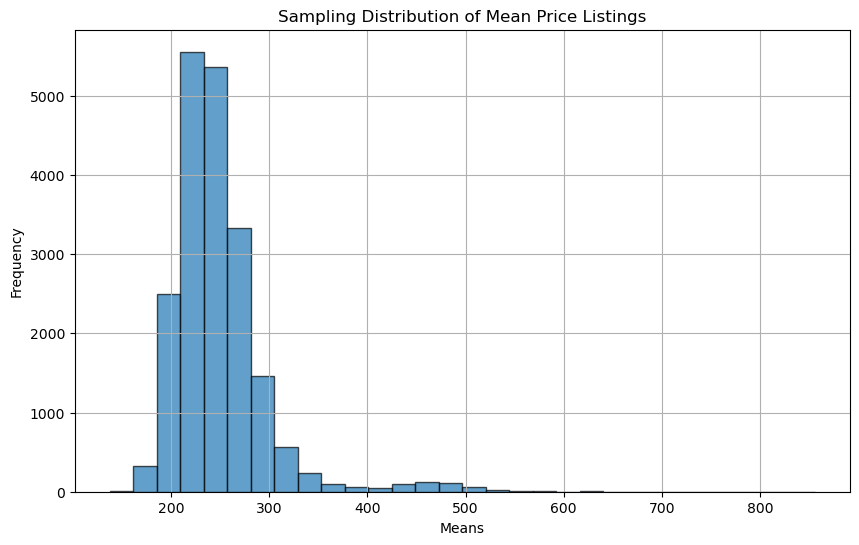

In [89]:
# Plot the histogram of the sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(sample_estimates['sample_mean'], bins=30, edgecolor='black', alpha=0.7)


# Add titles and labels
plt.title('Sampling Distribution of Mean Price Listings')
plt.xlabel('Means')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()


The sampling distribution appears to be centered around 250 and most sample mean prices range from about 220 to about 250. In fact, we can calculate the mean of the sample means.

In [90]:
sample_estimates["sample_mean"].mean()


248.72178375

We see that the sample means are centered around the population mean of 222.875. This is reassuring because it means that, on average, our sample means are accurate estimates of the population mean—there’s no consistent tendency to overestimate or underestimate it. In a real data analysis scenario where you only have one sample, this suggests that your sample estimate is just as likely to be above or below the true population mean.

### Bootstrapping

We learned that while we can compute a point estimate from a sample and evaluate its accuracy when we have access to the full population, real-world data analysis usually involves just one sample. Without access to the entire population, we can't construct the exact sampling distribution, making it challenging to measure how much our sample estimate might vary.

To address this, we use methods like the **bootstrap** to approximate the sampling distribution and estimate the uncertainty of our sample point estimate. A confidence interval provides a range of plausible values for the population parameter. The key idea is that with a sufficiently large sample, its distribution will resemble the population's distribution.

This section will cover creating a bootstrap distribution from a single sample. Here's the process:

1. **Randomly select an observation** from the original sample.
2. **Record the observation’s value**.
3. **Replace the observation** in the sample (sampling with replacement).
4. **Repeat steps 1–3** until you have the same number of observations as in the original sample. This forms your bootstrap sample.
5. **Calculate the point estimate** (mean, median, proportion, slope, etc.) from the bootstrap sample.
6. **Repeat steps 1–5 many times** to create a distribution of point estimates, known as the bootstrap distribution.
7. **Calculate the plausible range** of values around your observed point estimate from the bootstrap distribution.

In [98]:
np.random.seed(1234)
one_sample = airbnb.sample(n=40)
one_sample

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price
2912,5.970000e+17,Riley Park,Entire home/apt,9,3.0,4.0,5.0,214
787,1.986261e+07,Mount Pleasant,Entire home/apt,9,2.0,3.0,3.0,109
2696,5.333958e+07,Arbutus Ridge,Entire home/apt,3,1.0,1.0,0.0,200
3017,6.310000e+17,West End,Entire home/apt,2,1.0,1.0,0.0,223
1226,2.745958e+07,Downtown,Entire home/apt,1,NaN,1.0,NaN,126
2620,5.255417e+07,Downtown Eastside,Entire home/apt,4,1.0,1.0,2.0,198
4883,9.790000e+17,Downtown Eastside,Entire home/apt,7,2.0,3.0,4.0,834
608,1.554257e+07,Kitsilano,Entire home/apt,5,1.0,2.0,3.0,99
1400,3.124019e+07,Arbutus Ridge,Private room,2,1.0,1.0,2.0,133
149,3.100878e+06,Downtown,Entire home/apt,2,1.0,1.0,0.0,60


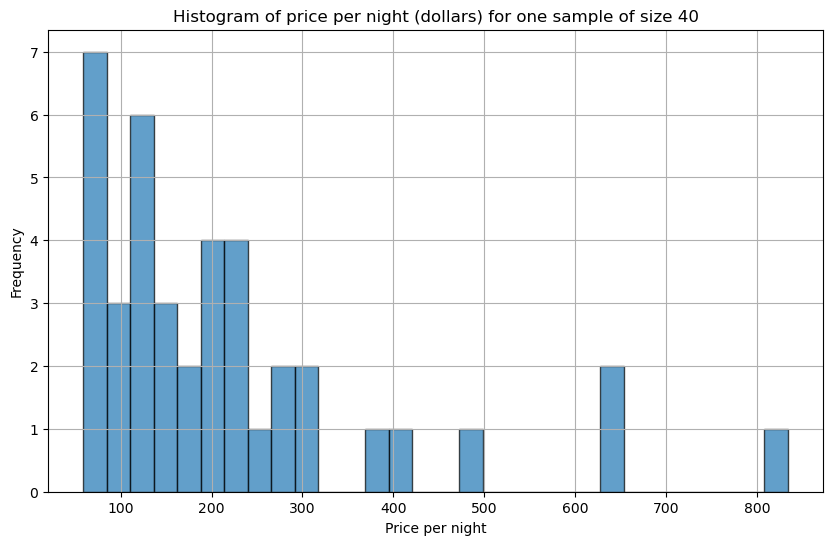

In [99]:
# Histogram of price per night (dollars) for one sample of size 40.
plt.figure(figsize=(10, 6))
plt.hist(one_sample['price'], bins=30, edgecolor='black', alpha=0.7)
# Add titles and labels
plt.title('Histogram of price per night (dollars) for one sample of size 40')
plt.xlabel('Price per night')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()


In [100]:
one_sample['price'].mean()

219.85

This sample has a mean price per night of $219.85 USD.

To generate a bootstrap of this sample, and calculate a point estimate:

1. Generate a single bootstrap sample: Use the sample function on your DataFrame, setting `frac=1` to sample as many observations as there are rows in the DataFrame. This ensures that the bootstrap sample size matches the original sample size. Set `replace=True` to allow sampling with replacement.

2. Calculate the point estimate: Compute the point estimate (e.g., mean, median, proportion- in our case, we're looking at the mean) from the bootstrap sample.

This process generates a bootstrap sample and calculates the point estimate based on that sample. You would repeat this process many times to build the bootstrap distribution and estimate the range of plausible values for your point estimate.

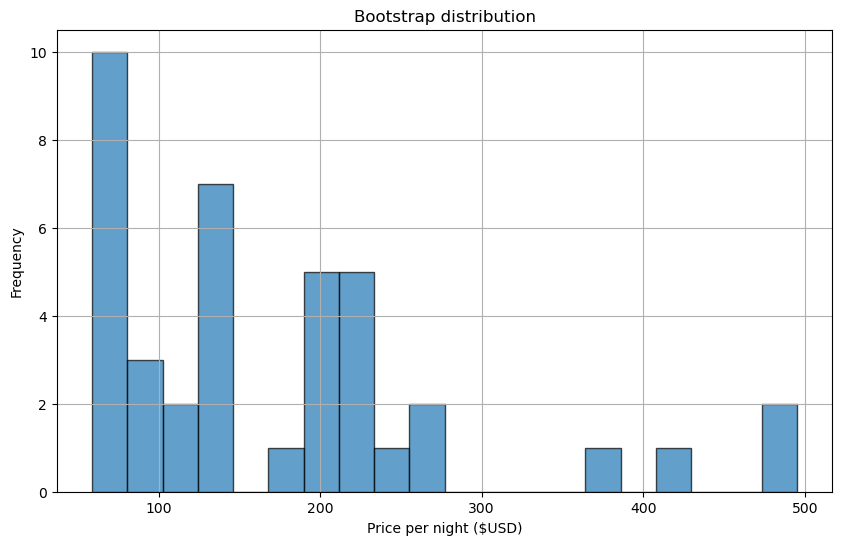

In [101]:
boot1 = one_sample.sample(frac=1, replace=True)

# Plot the histogram of the bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(boot1['price'], bins=20, edgecolor='black', alpha=0.7)


# Add titles and labels
plt.title('Bootstrap distribution')
plt.xlabel('Price per night ($USD)')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

In [102]:
boot1["price"].mean()

175.425

We can see that the histogram of the bootstrap sample looks similar to the original sample histogram, but they’re not exactly the same. This is because when we sample with replacement, we don’t get the exact same values as in the original sample.

We’re simulating the process of drawing a new sample from the population by using our original sample. 

Next, we'll generate 20,000 bootstrap samples from the original sample and calculate the mean for each. Since we don’t have the full population, using the original sample this way is often the best we can do.

In [107]:
boot20000 = pd.concat([
    one_sample.sample(frac=1, replace=True).assign(replicate=n)
    for n in range(20_000)
])
boot20000

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price,replicate
1226,2.745958e+07,Downtown,Entire home/apt,1,NaN,1.0,NaN,126,0
2692,5.331242e+07,Strathcona,Entire home/apt,4,1.0,2.0,3.0,200,0
142,2.988185e+06,West End,Entire home/apt,4,NaN,2.0,NaN,59,0
3851,8.160000e+17,Hastings-Sunrise,Entire home/apt,4,1.0,2.0,2.0,300,0
4883,9.790000e+17,Downtown Eastside,Entire home/apt,7,2.0,3.0,4.0,834,0
...,...,...,...,...,...,...,...,...,...
1465,3.287258e+07,Kitsilano,Entire home/apt,4,2.0,2.0,2.0,136,19999
1619,3.519493e+07,West End,Entire home/apt,3,1.0,1.0,2.0,143,19999
3599,7.590000e+17,Kensington-Cedar Cottage,Entire home/apt,8,NaN,3.0,NaN,273,19999
4255,8.910000e+17,Downtown Eastside,Entire home/apt,4,1.0,0.0,0.0,372,19999


In [108]:
# Calculate the mean price for each replicate
boot_means = boot20000.groupby('replicate')['price'].mean().reset_index(name='mean_price')
boot_means


,replicate,mean_price
0,0,221.500
1,1,217.450
2,2,232.525
3,3,239.075
4,4,255.750
...,...,...
19995,19995,237.275
19996,19996,209.400
19997,19997,216.400
19998,19998,195.425


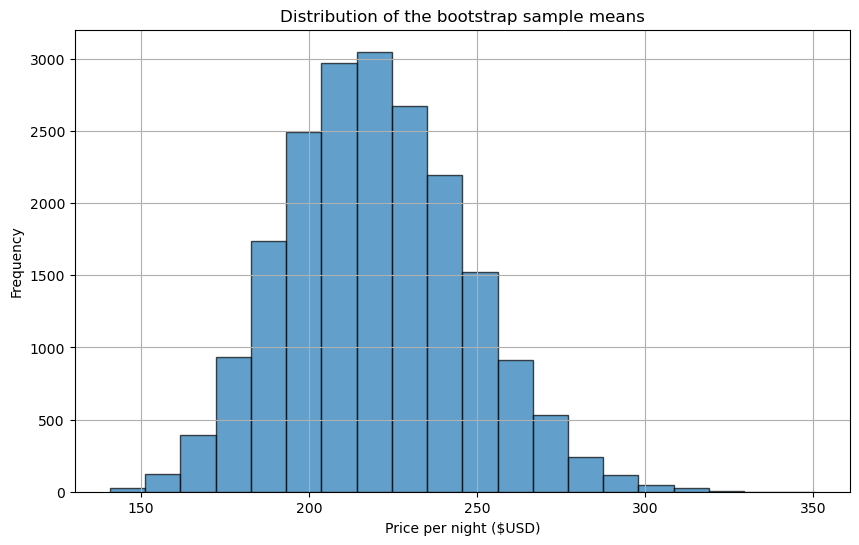

In [109]:
# Plot the histogram of the bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(boot_means['mean_price'], bins=20, edgecolor='black', alpha=0.7)


# Add titles and labels
plt.title('Distribution of the bootstrap sample means')
plt.xlabel('Price per night ($USD)')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

The bootstrap distribution lets us get a sense of the point estimate’s variability.
Because we are resampling from the original sample repeatedly, we see that the bootstrap distribution is centered at the original sample’s mean value.

### Bootstrap to calculate a plausible range

Now that we have our bootstrap distribution, we can create a 95% confidence interval. This interval gives us a range of plausible values for the population parameter. Here’s how it works:

95% Confidence: If we took 100 random samples and created 100 confidence intervals, about 95 of those intervals would include the true population parameter. You can choose different confidence levels like 90% or 99%, depending on how confident you want to be. A higher confidence level means a wider interval.

Calculating the 95% Interval:

1. Sort the bootstrap sample values.
2. Find the value where 2.5% of the values fall below it (lower bound).
3. Find the value where 97.5% of the values fall below it (upper bound).


In [111]:
ci_bounds = boot_means["mean_price"].quantile([0.025, 0.975])
ci_bounds

0.025    171.449375
0.975    275.675625
Name: mean_price, dtype: float64

To wrap up our estimation, we'd report:

- **Point Estimate**: The sample mean price-per-night of 40 Airbnb listings is $175.425.
- **95% Confidence Interval**: We estimate that the true mean price-per-night for all Airbnb listings in Vancouver is between $171.44 and $275.68.

Our interval includes the true population mean ($249.16), but in real-world scenarios, we wouldn’t know the true population mean because we only have one sample.

### Conclusion

In this notebook, we introduced the basics of statistical inference, laying the groundwork for more advanced techniques like testing differences between populations and assessing relationships between variables. This foundational knowledge will be crucial as you delve into more complex statistical analyses in the future! Here's a summary of what we covered:

1. **Sampling distribution**: We drew random samples and created a sampling distribution from a finite population.
2. **Bootstrapping:** We created a bootstrap distribution to approximate a sampling distribution.


We hope this notebook has provided a practical understanding of bootstrapping when estimating population parameters. Feel free to experiment further with the dataset or the code to enhance your learning!